# SARSA Method

## Prepare the packages

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
if "../" not in sys.path:
    sys.path.append("../") 

In [3]:
from collections import defaultdict
import gym
from el_agent import ELAgent
from frozen_lake_util import show_q_value

## Define SARSA Agent

In [4]:
class SARSAAgent(ELAgent):

    def __init__(self, epsilon=0.1):
        super().__init__(epsilon)

    def learn(self, env, episode_count=1000, gamma=0.9,
              learning_rate=0.1, render=False, report_interval=50):
        self.init_log()
        self.Q = defaultdict(lambda: [0] * len(actions))
        actions = list(range(env.action_space.n))
        for e in range(episode_count):
            s = env.reset()
            done = False
            a = self.policy(s, actions)
            while not done:
                if render:
                    env.render()
                n_state, reward, done, info = env.step(a)

                n_action = self.policy(n_state, actions)  # On-policy
                gain = reward + gamma * self.Q[n_state][n_action]
                estimated = self.Q[s][a]
                self.Q[s][a] += learning_rate * (gain - estimated)
                s = n_state
                a = n_action
            else:
                self.log(reward)

            if e != 0 and e % report_interval == 0:
                self.show_reward_log(episode=e)

## Train Agent

In [5]:
def train():
    agent = SARSAAgent()
    env = gym.make("FrozenLakeEasy-v0")
    agent.learn(env, episode_count=500)
    show_q_value(agent.Q)
    agent.show_reward_log()

At Episode 50 average reward is 0.02 (+/-0.14).
At Episode 100 average reward is 0.1 (+/-0.3).
At Episode 150 average reward is 0.78 (+/-0.414).
At Episode 200 average reward is 0.86 (+/-0.347).
At Episode 250 average reward is 0.88 (+/-0.325).
At Episode 300 average reward is 0.82 (+/-0.384).
At Episode 350 average reward is 0.82 (+/-0.384).
At Episode 400 average reward is 0.84 (+/-0.367).
At Episode 450 average reward is 0.92 (+/-0.271).


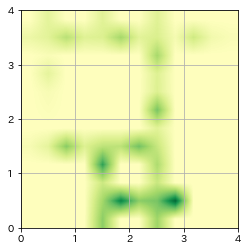

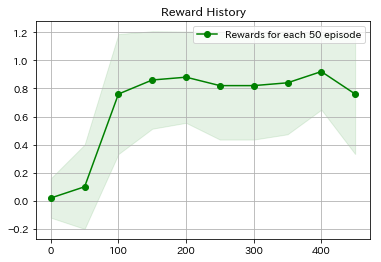

In [6]:
agent = train()